In [1]:
#Mixed Species experiments for XYZeq
#

In [2]:
#import necessary packages
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.cm as cm
import seaborn as sns
import numpy as np

import scanpy.api as sc

In [3]:
pwd

'/Users/derekbogdanoff/projects/XYZeq'

In [4]:
#designate working directory 
#path should contain: matrix.mtx, plate_map.csv, cell_annotate.txt
#for scanpy annotations: barcodes.tsv, genes.tsv
#
#



path="./data/20190917/"

#path="./data/20190522/"



#get and format the data

array_columns=['gene','cell','count']

count_matrix=pd.read_csv(path + 'matrix.mtx', sep=' ', header=None, index_col=None, skiprows=3, names=array_columns)


#check the format of the data
count_matrix.head()

gene  cell  count
0  100629     1      1
1  100709     1      2
2  101247     1      1
3  101961     1      1
4  101971     1      3

In [719]:

xyz=count_matrix.groupby('cell')['gene'].nunique()
#x=count_matrix.groupby('cell')['count'].sum()

In [720]:
#xyz=xyz[xyz < 3000]
#x=x[x<3000]

number of UMIs total: 138304444
number of cells: 78772


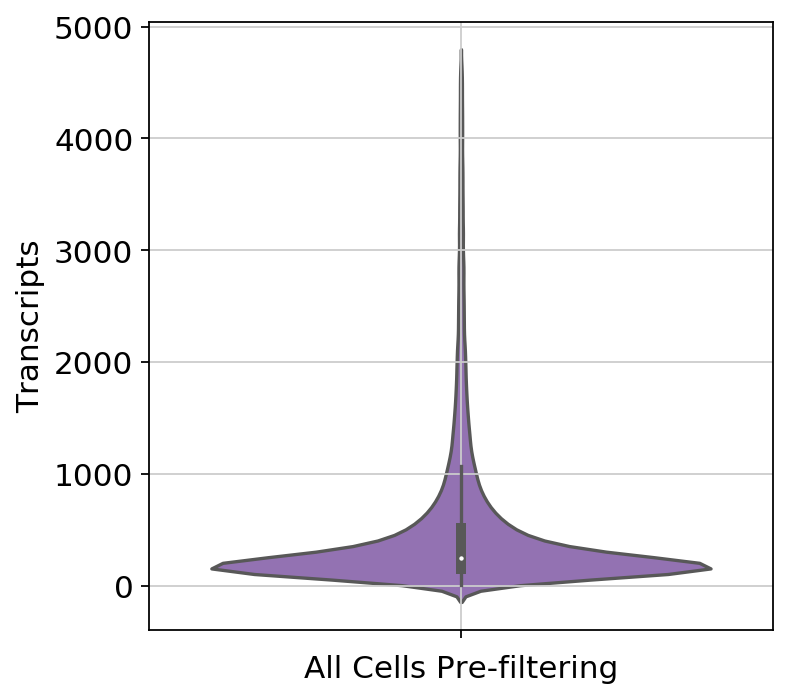

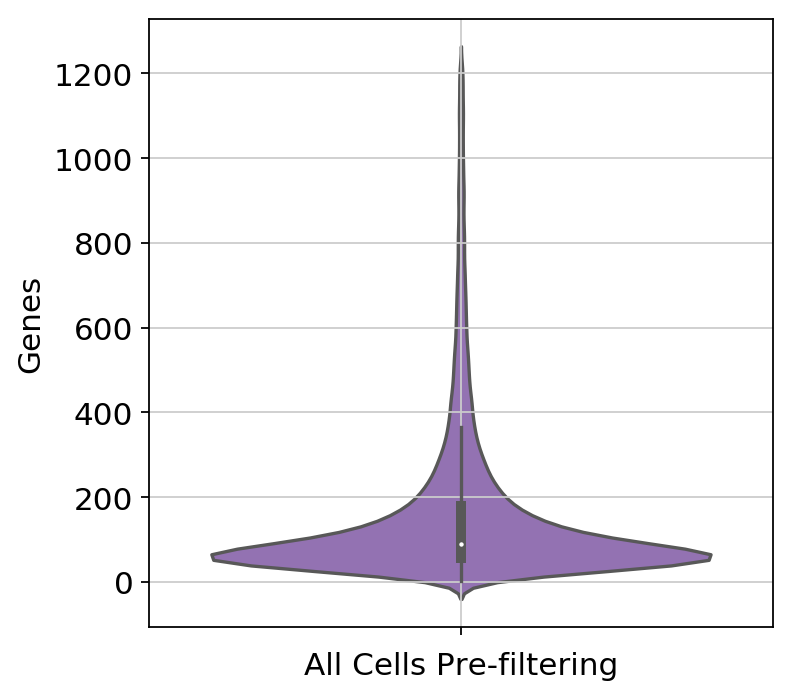

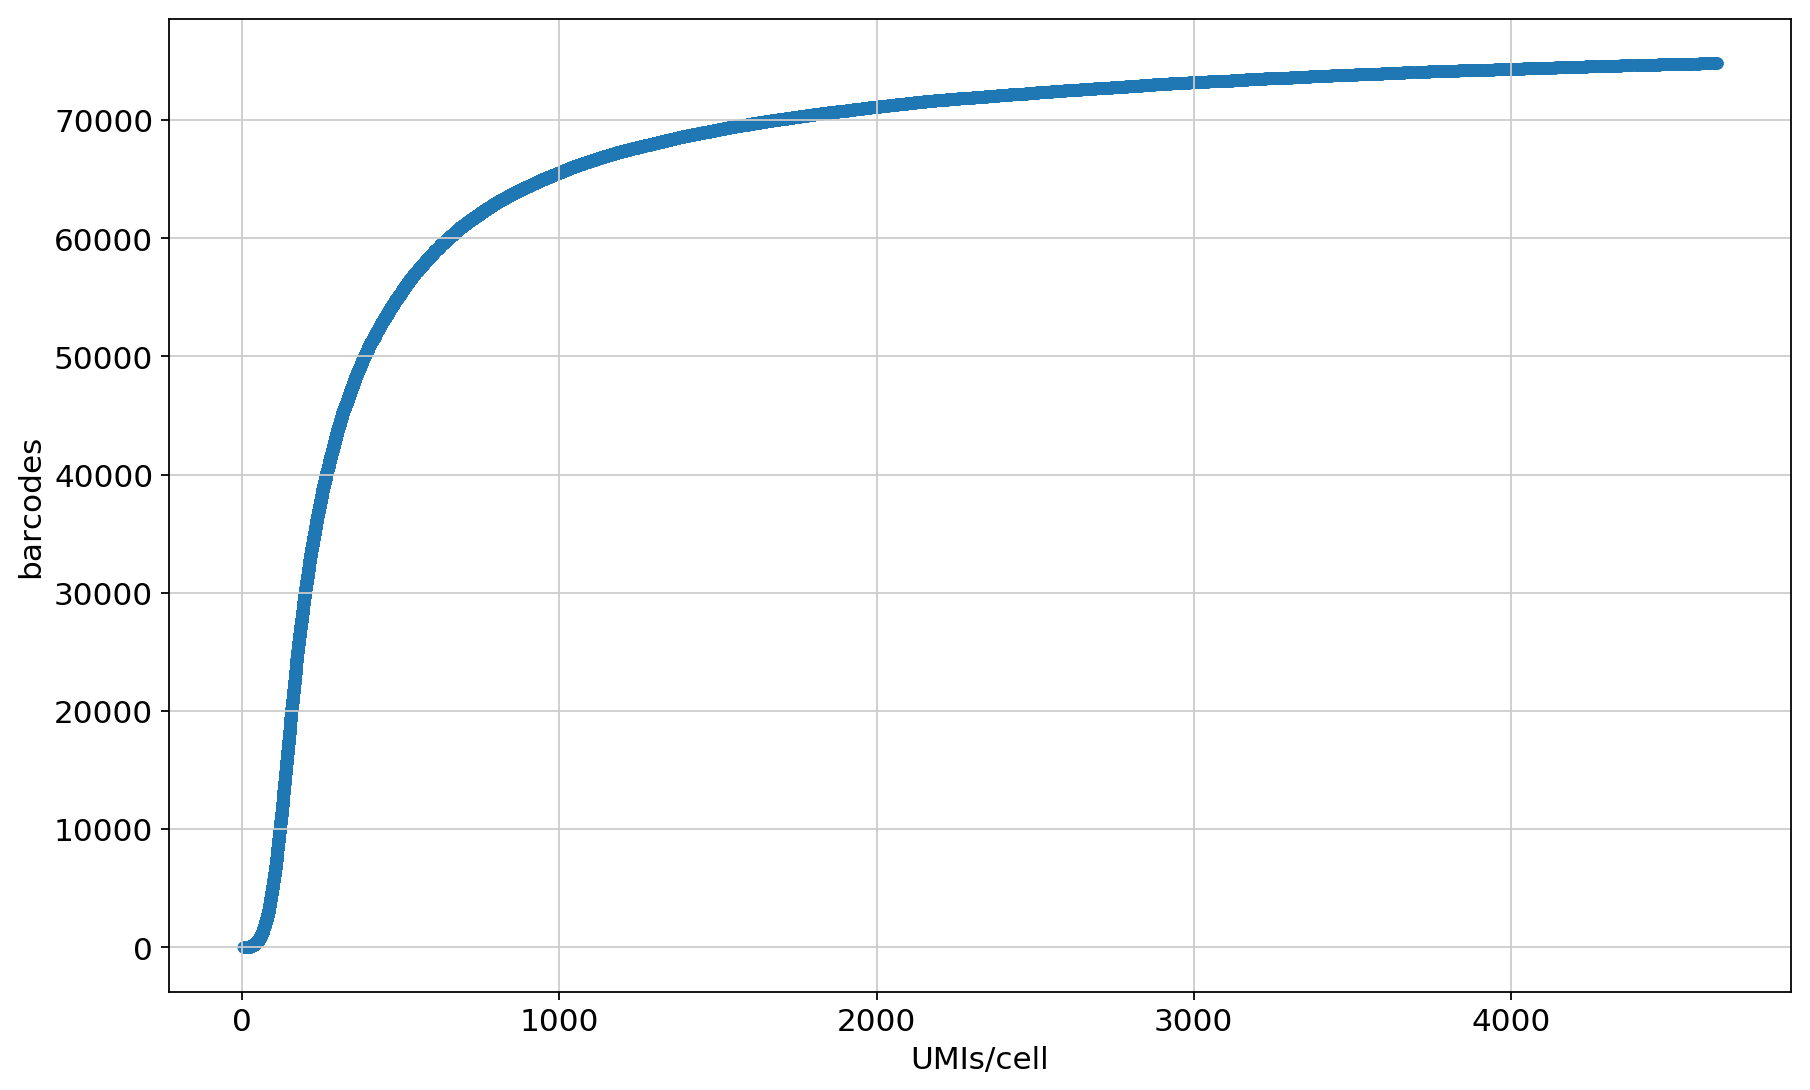

In [721]:
##show some metrics for the data 

total_UMIS=count_matrix['count'].sum()
cell_number=count_matrix['cell'].nunique()


print("number of UMIs total:", total_UMIS)
print("number of cells:", cell_number)

plt.rcParams['figure.figsize'] = [5, 5]

#UMIs per cell
UMIs=count_matrix.groupby('cell')['count'].sum()

q=UMIs.quantile(.95)
UMIs=UMIs[UMIs < q]

ax=sns.violinplot(UMIs, orient='v', color='#9467bd')
ax.set(ylabel='Transcripts', xlabel='All Cells Pre-filtering')
plt.grid(True)
plt.show()

#genes per cell
genes=count_matrix.groupby('cell')['gene'].nunique()

q=genes.quantile(0.95)
genes=genes[genes < q]


ax=sns.violinplot(genes, orient='v', color='#9467bd')
ax.set(ylabel='Genes', xlabel='All Cells Pre-filtering')
plt.grid(True)
plt.show()



#make UMI knee plot

counts=UMIs.reset_index()
counts=counts.sort_values(by=['count'], axis=0, ascending=True)
counts=counts.reset_index()
counts=counts.drop('index',axis=1)
counts=counts.reset_index()
counts.columns=['barcodes','cell','UMIs/cell']
plt.rcParams['figure.figsize'] = [13, 8]
counts.plot.scatter(x='UMIs/cell',y='barcodes')


In [24]:
cd scripts/

/Users/derekbogdanoff/projects/XYZeq/scripts


In [25]:
from hex_spatial_map import plot_spatial_array

In [26]:
cd ..

/Users/derekbogdanoff/projects/XYZeq


In [27]:
pwd

'/Users/derekbogdanoff/projects/XYZeq'

In [722]:
cat data/20190917/cell_annotate.txt | grep L20C1 > data/20190917/cell_annotate_L20C1.txt

In [723]:
#pd.read_csv('data/20190828/covars.csv')

In [1158]:
pwd

'/Users/derekbogdanoff/projects/XYZeq'

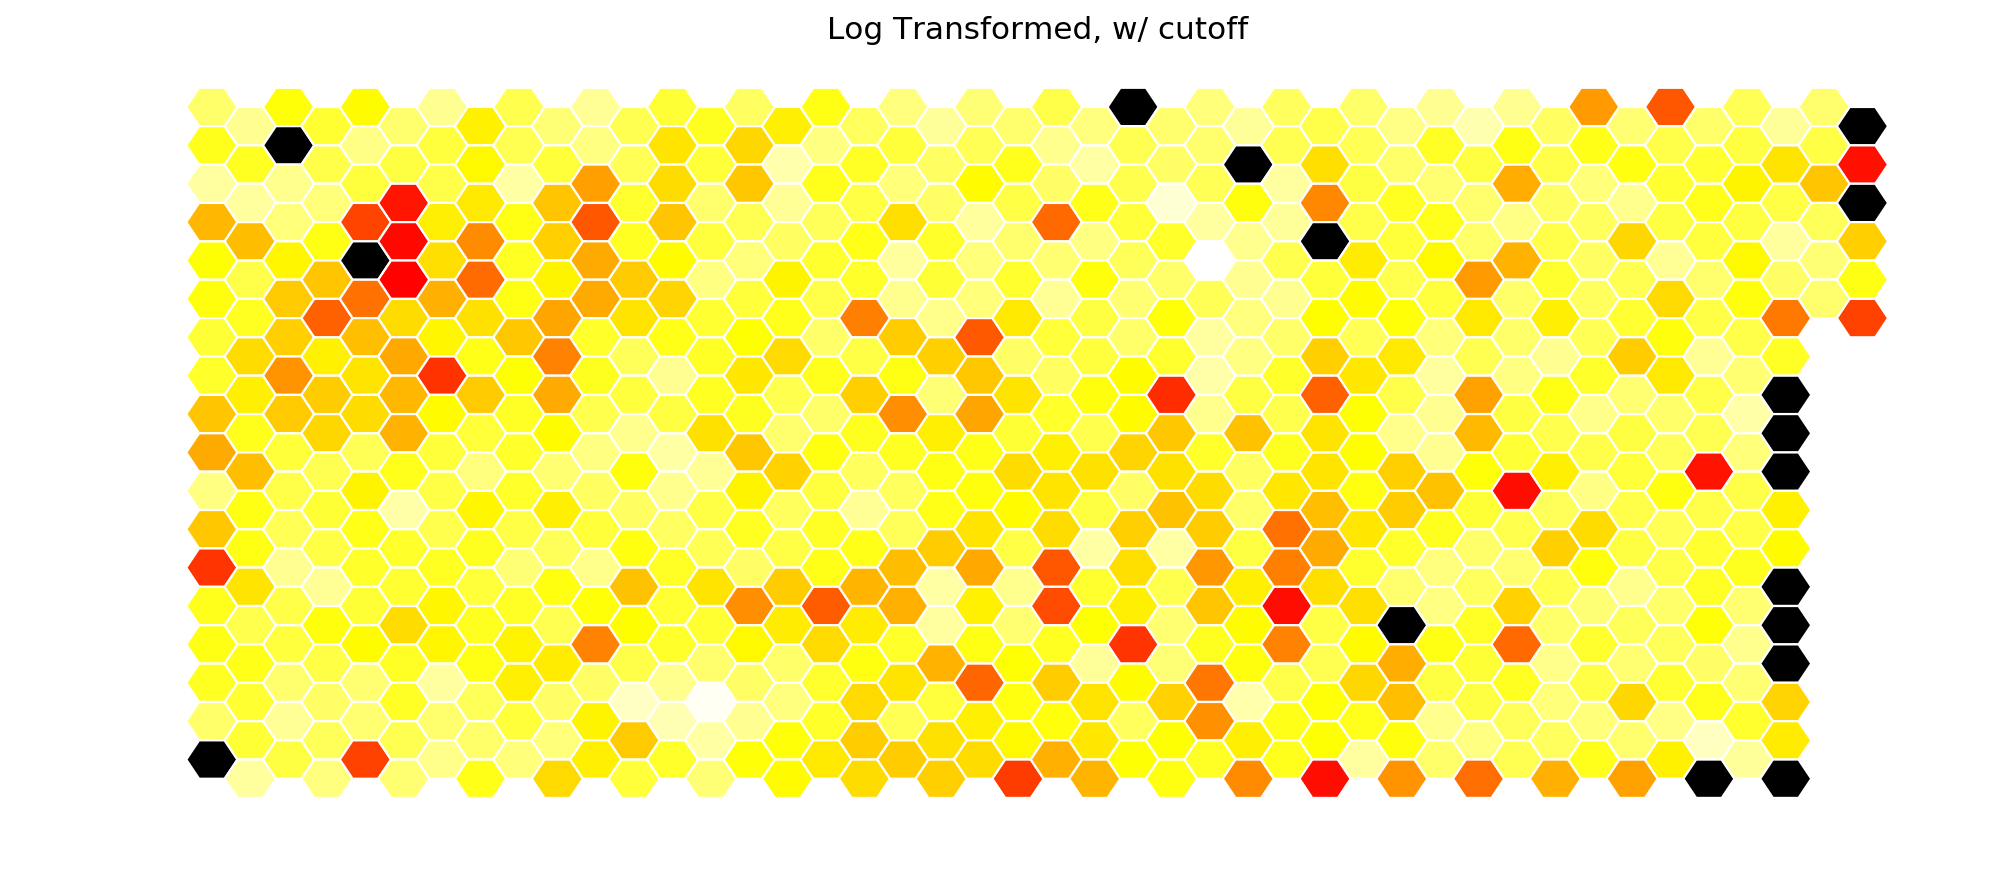

In [724]:
#plot spatial map of UMI counts
plot_spatial_array(path+'matrix.mtx', path+'cell_annotate_L20C1.txt', 
                   path+'gene_name_annotate.txt', 
                   path+'plate23_map.csv','UMIS', 0)

#plt.savefig('./fig_dump/Tgfbi.pdf',transparant=True,frameon=True,bbox_inches='tight')


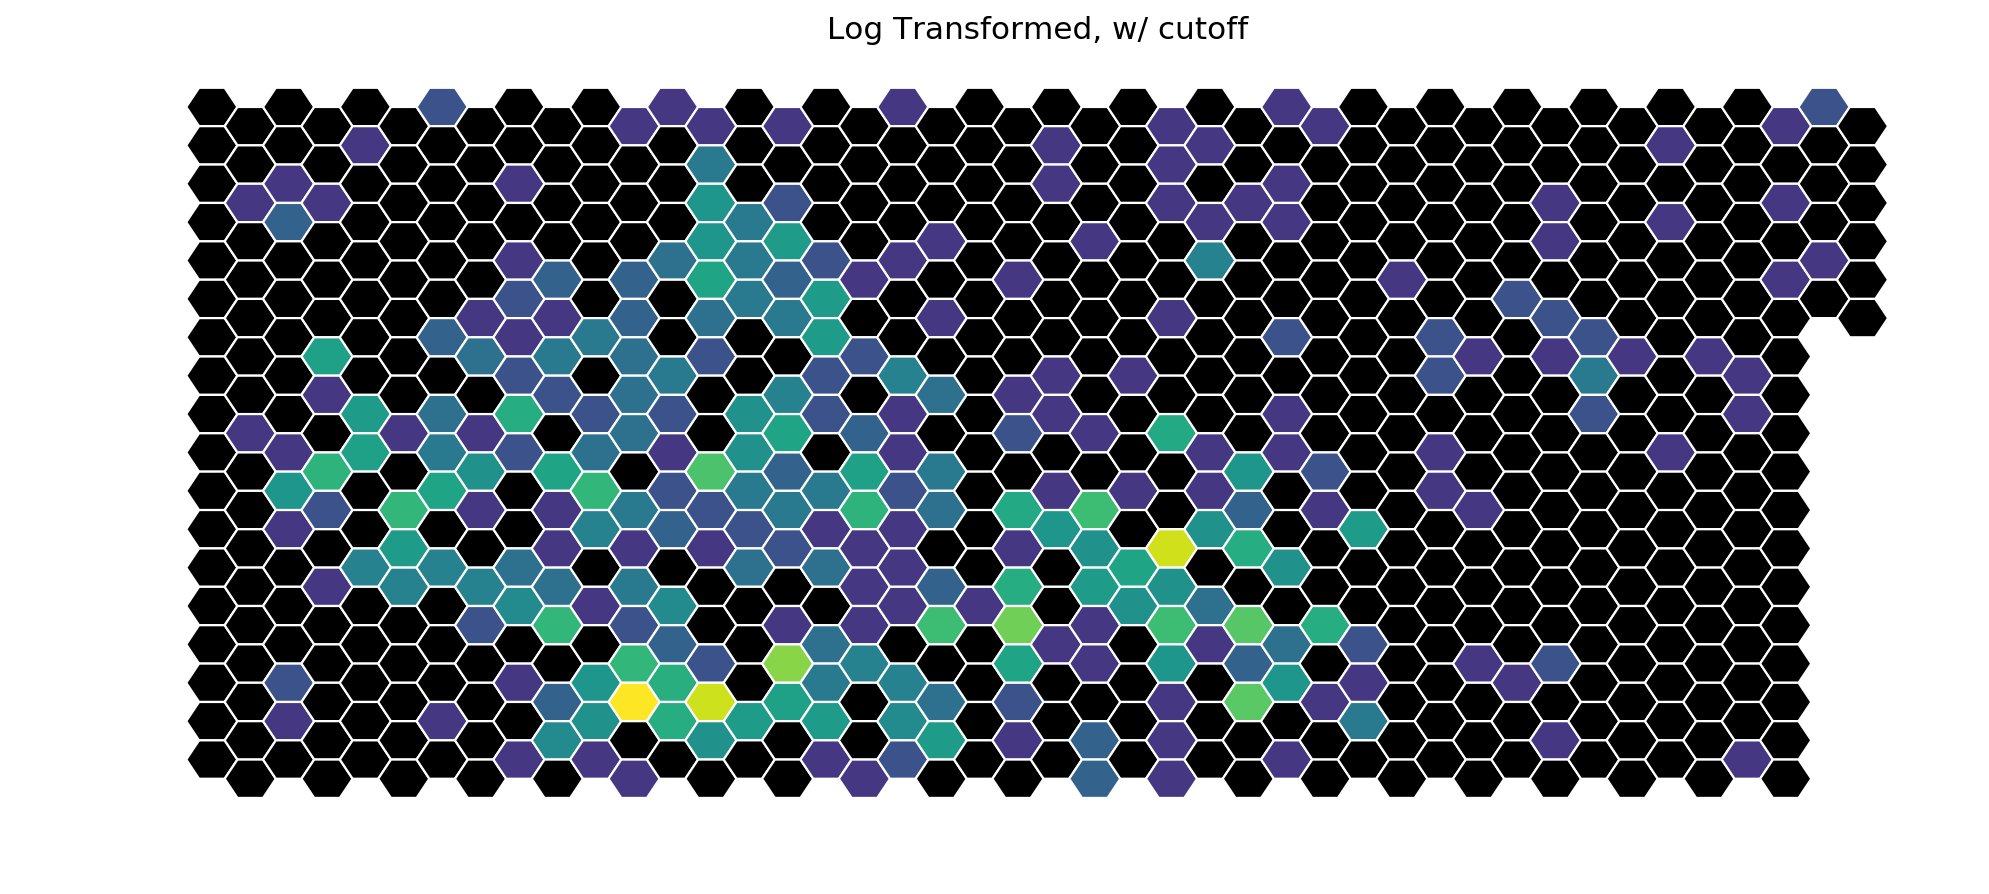

In [727]:
#plot spatial map of Apoa1 counts as background hepatocyte marker
plot_spatial_array(path+'matrix.mtx', path+'cell_annotate_L20C1.txt', 
                   path+'gene_name_annotate.txt', 
                   path+'plate23_map.csv','mm10_Skap1',0)

#plt.savefig('./fig_dump/hg19_MALAT1.pdf',transparant=True,frameon=True,bbox_inches='tight')


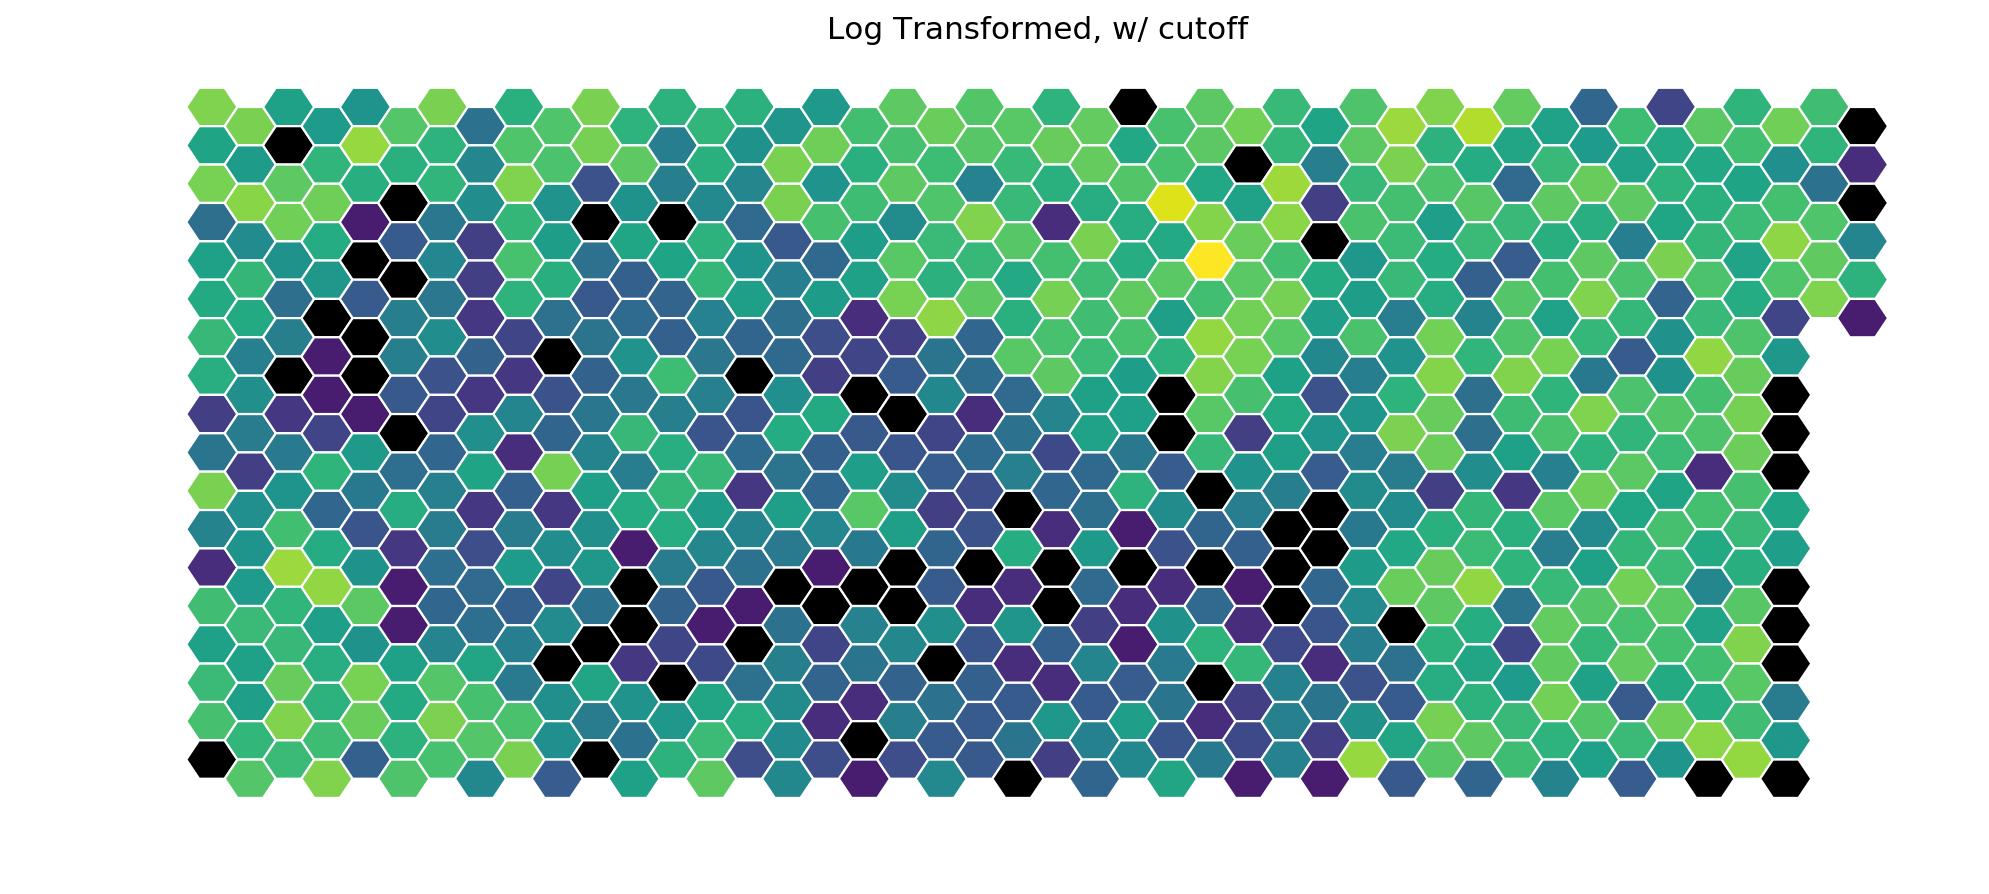

In [726]:
#plot spatial map of Apoa1 counts as background hepatocyte marker
plot_spatial_array(path+'matrix.mtx', path+'cell_annotate_L20C1.txt', 
                   path+'gene_name_annotate.txt', 
                   path+'plate23_map.csv','hg19_MALAT1',0)

#plt.savefig('./fig_dump/hg19_MALAT1.pdf',transparant=True,frameon=True,bbox_inches='tight')



In [4]:
pwd

'/Users/derekbogdanoff/projects/XYZeq'

In [198]:
##scanpy tsne UMAP

sc.settings.verbosity=3
sc.settings.set_figure_params(dpi=80)
sc.logging.print_versions()
#results_file = './write/results.h5ad'

#sc.settings = True

adata=sc.read('/Users/derekbogdanoff/projects/XYZeq/data/20190917/matrix.mtx', cache=False).T






##load the data
#adata=sc.read(path + 'matrix.mtx', cache=False)



##name the genes
adata.var_names = [gene.strip() for gene in open(path + 'genes.tsv', 'r')]


##name the cells
adata.obs_names = [barcode.strip() for barcode in open(path + 'barcodes.tsv', 'r')] 




scanpy==1.4.3 anndata==0.6.21 umap==0.3.9 numpy==1.14.6 scipy==1.2.2 pandas==0.23.4 scikit-learn==0.20.0 statsmodels==0.9.0 python-igraph==0.7.1 louvain==0.6.1 
--> This might be very slow. Consider passing `cache=True`, which enables much faster reading from a cache file.


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [199]:
adata.var_names_make_unique()

In [200]:
#filter based on obs.names

adata=adata[adata.obs_names.str.contains('L20C1')]

#adata=adata[~adata.obs_names.str.contains('S15C')]



In [201]:
adata.obs_names

Index(['L20C1_P1A01F.GACCGTCTCATAGCGC', 'L20C1_P1A01F.GCCTCTTAGATAGACA',
       'L20C1_P1A01F.GATCCGTCGTCAGACT', 'L20C1_P1A01F.GGTCACCACTTACAGT',
       'L20C1_P1A01F.TTACCGTTGGCCAATA', 'L20C1_P1A01F.TCAACAGAACCACCGA',
       'L20C1_P1A01F.GCAGTACAGACCAGGC', 'L20C1_P1A01F.TAGCCACAAGCGGACA',
       'L20C1_P1A01F.GTCCATGATTAGTAGC', 'L20C1_P1A01F.CTCCTGTCCAAGACAT',
       ...
       'L20C1_P4H12F.TCCACCGTATGCGCTG', 'L20C1_P4H12F.ATCTCTTGTCTTGGCG',
       'L20C1_P4H12F.CTCTTGGAGGTCTTCG', 'L20C1_P4H12F.TACCACGCCTACCAGC',
       'L20C1_P4H12F.CGAGGCTATGCGTTGG', 'L20C1_P4H12F.CTGGTAATAAGAGCGC',
       'L20C1_P4H12F.TACGTGCTAACTGCTA', 'L20C1_P4H12F.TCCGAACCGAGATTAA',
       'L20C1_P4H12F.CATGCGTGCTCTTACG', 'L20C1_P4H12F.ATCGAATGCGCCACCG'],
      dtype='object', length=26436)

In [202]:
#adata.write_h5ad('20190920_L20T.h5ad')

In [203]:
#sc.pp.downsample_counts(adata, target_counts=200, random_state=0, copy=False)

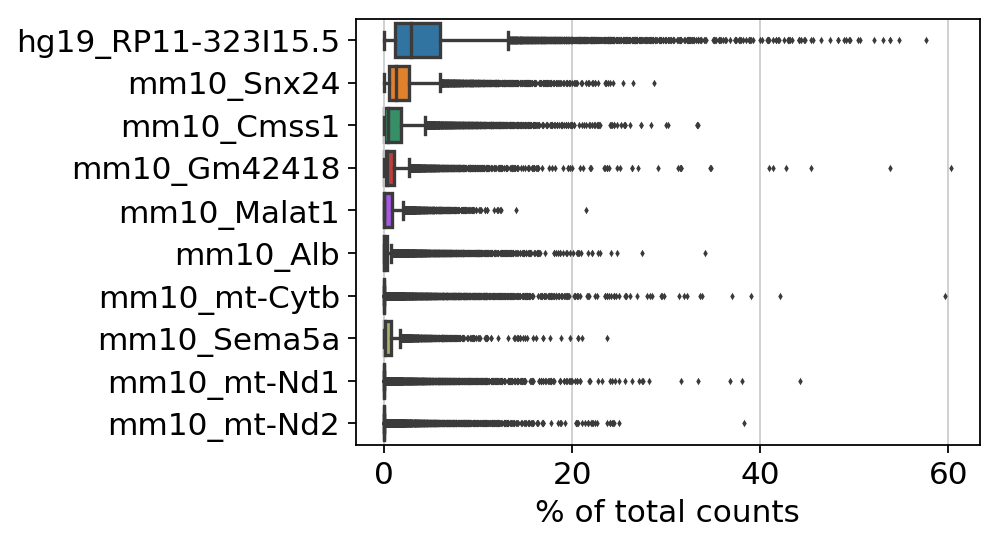

In [204]:
sc.pl.highest_expr_genes(adata, n_top=10) 

In [205]:
#sc.pp.subsample(adata,fraction=.1)

In [206]:
#sc.pp.downsample_counts(adata, total_counts=1200000)

In [207]:
adata

View of AnnData object with n_obs × n_vars = 26436 × 121472 

In [1160]:
# ##post processing filter minimum UMIS and genes
sc.pp.filter_cells(adata, min_counts=300)#800
sc.pp.filter_cells(adata, min_genes=100) #150

#sc.pp.filter_cells(adata, max_counts=15000)
#sc.pp.filter_cells(adata, max_genes=2000) 

##post processing filter genes 
sc.pp.filter_genes(adata, min_cells=2) #5
#sc.pp.filter_genes(adata, max_cells=500)   



## define mito genes 
mito_genes=[name for name in adata.var_names if name.startswith(('mm10_mt-', 'hg19_mt-', 'mt-'))]



#create new obs anotation to define percent mito for each cell 
adata.obs['percent_mito'] = np.sum(adata[:, mito_genes].X, axis=1) / np.sum(adata.X, axis=1)*100

#create new obs anotation to define UMIs per cell
adata.obs['n_counts'] = adata.X.sum(axis=1)



Transforming to str index.
Transforming to str index.
Transforming to str index.
Transforming to str index.


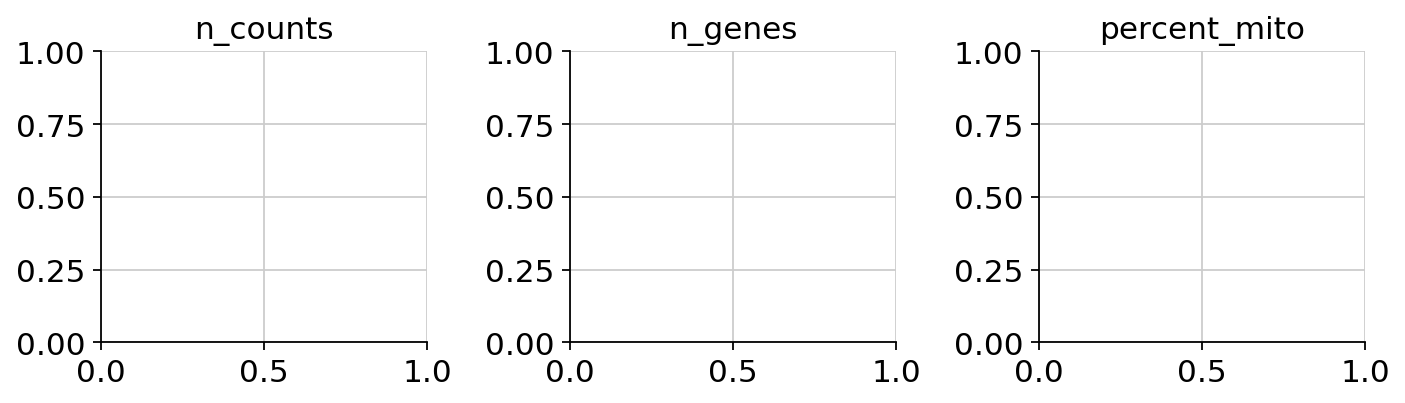

In [1161]:
sc.pl.violin(adata, [
                     'n_counts', 
                     'n_genes', 
                     'percent_mito'
                    ], jitter=0.4, multi_panel=True)

In [210]:
spec_filter= [name for name in adata.var_names if not name.startswith('mm10_Itgam')]
adata=adata[:, spec_filter]

In [211]:
spec_filter= [name for name in adata.var_names if not name.startswith('mm10_Smim20')]
adata=adata[:, spec_filter]

In [212]:
##filter based on observation

adata = adata[adata.obs['n_genes'] < 2000, :]
adata = adata[adata.obs['n_counts'] < 20000, :]
adata = adata[adata.obs['percent_mito'] < 10, :]


In [213]:
adata

View of AnnData object with n_obs × n_vars = 10194 × 50573 
    obs: 'n_counts', 'n_genes', 'percent_mito'
    var: 'n_cells'

/Users/derekbogdanoff/projects/venv3/lib/python3.7/site-packages/scanpy/plotting/_anndata.py:311: DeprecationWarning: Use obs_vector instead of _get_obs_array, _get_obs_array will be removed in the future.
  x_arr = adata._get_obs_array(x, use_raw=use_raw, layer=layers[0])
/Users/derekbogdanoff/projects/venv3/lib/python3.7/site-packages/anndata/base.py:1618: FutureWarning: In a future version of AnnData, access to `.X` by passing `layer='X'` will be removed. Instead pass `layer=None`.
  FutureWarning
/Users/derekbogdanoff/projects/venv3/lib/python3.7/site-packages/scanpy/plotting/_anndata.py:312: DeprecationWarning: Use obs_vector instead of _get_obs_array, _get_obs_array will be removed in the future.
  y_arr = adata._get_obs_array(y, use_raw=use_raw, layer=layers[1])
/Users/derekbogdanoff/projects/venv3/lib/python3.7/site-packages/anndata/base.py:1618: FutureWarning: In a future version of AnnData, access to `.X` by passing `layer='X'` will be removed. Instead pass `layer=None`.
  Fu

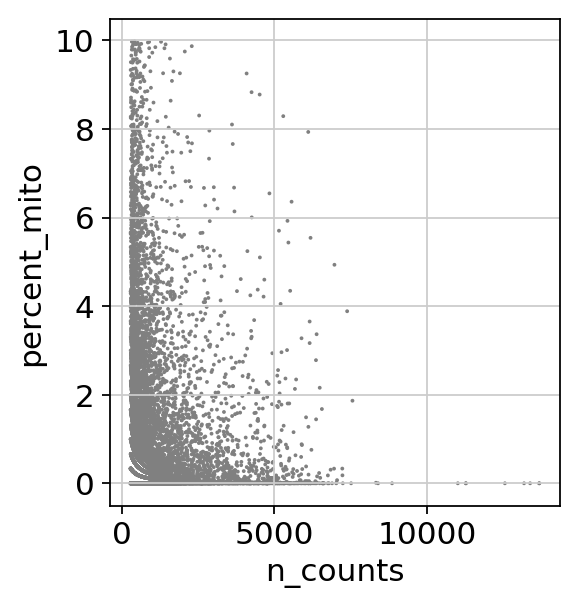

/Users/derekbogdanoff/projects/venv3/lib/python3.7/site-packages/scanpy/plotting/_anndata.py:311: DeprecationWarning: Use obs_vector instead of _get_obs_array, _get_obs_array will be removed in the future.
  x_arr = adata._get_obs_array(x, use_raw=use_raw, layer=layers[0])
/Users/derekbogdanoff/projects/venv3/lib/python3.7/site-packages/anndata/base.py:1618: FutureWarning: In a future version of AnnData, access to `.X` by passing `layer='X'` will be removed. Instead pass `layer=None`.
  FutureWarning
/Users/derekbogdanoff/projects/venv3/lib/python3.7/site-packages/scanpy/plotting/_anndata.py:312: DeprecationWarning: Use obs_vector instead of _get_obs_array, _get_obs_array will be removed in the future.
  y_arr = adata._get_obs_array(y, use_raw=use_raw, layer=layers[1])
/Users/derekbogdanoff/projects/venv3/lib/python3.7/site-packages/anndata/base.py:1618: FutureWarning: In a future version of AnnData, access to `.X` by passing `layer='X'` will be removed. Instead pass `layer=None`.
  Fu

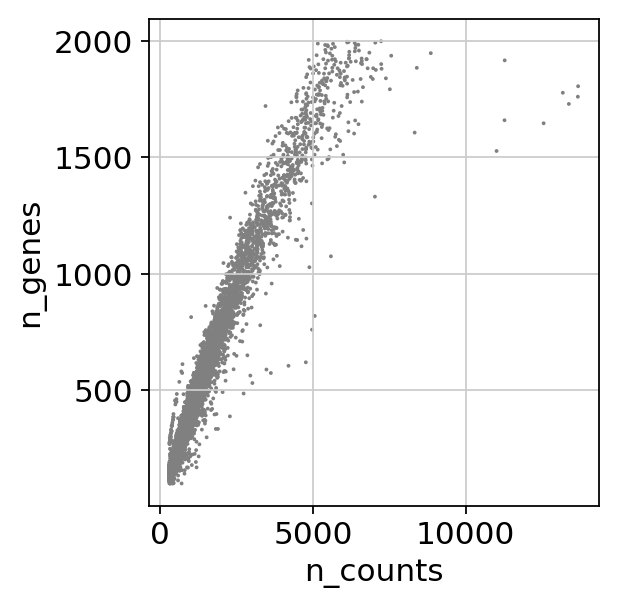

In [214]:
sc.pl.scatter(adata, x='n_counts', y='percent_mito')
sc.pl.scatter(adata, x='n_counts', y='n_genes')



In [215]:
adata

AnnData object with n_obs × n_vars = 10194 × 50573 
    obs: 'n_counts', 'n_genes', 'percent_mito'
    var: 'n_cells'

In [216]:
##create raw data file

adata.raw = sc.pp.log1p(adata, copy=True)




In [217]:
##normalize counts per cell to 10K each 

sc.pp.normalize_per_cell(adata, counts_per_cell_after=1e4)



In [218]:
print(adata.X.sum(axis=1))

[[ 9999.999]
 [10000.   ]
 [ 9999.999]
 ...
 [10000.   ]
 [10000.001]
 [10000.002]]


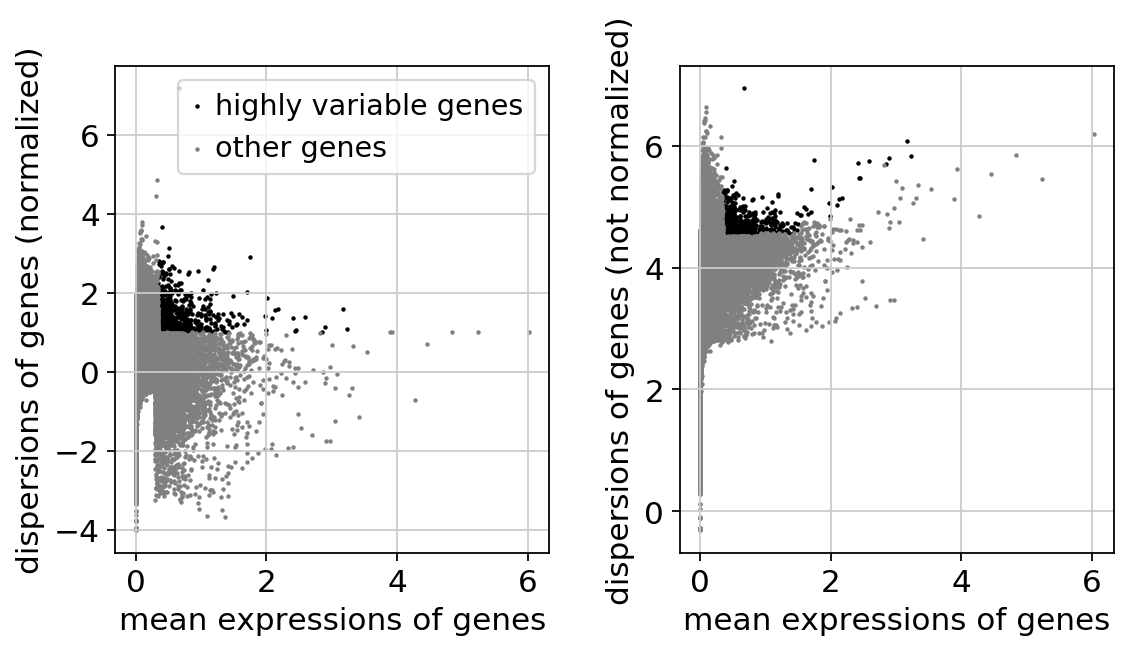

In [219]:



filter_result = sc.pp.filter_genes_dispersion(
    adata.X, min_mean=0.35, max_mean=7, min_disp=1)
    #adata.X, min_mean=0.0, max_mean=.5, min_disp=1.5)
    
    
sc.pl.filter_genes_dispersion(filter_result,)


In [220]:
filter_result

rec.array([(False, 1.0000000e-12,       nan,         nan),
           (False, 1.0000000e-12,       nan,         nan),
           (False, 4.7739083e-03, 2.3682988, -0.99177235), ...,
           (False, 1.4005898e+00, 3.5640588, -1.8739648 ),
           (False, 3.1856763e-01, 4.1500416,  0.12436596),
           (False, 1.7259397e-02, 3.1140437, -0.1549883 )],
          dtype=[('gene_subset', '?'), ('means', '<f4'), ('dispersions', '<f4'), ('dispersions_norm', '<f4')])

In [221]:
sum(filter_result.gene_subset)

686

In [222]:
#percent of genes that are highly variable
sum(filter_result.gene_subset)/len(filter_result.gene_subset)*100

1.356455025408815

In [223]:
adata = adata[:, filter_result.gene_subset]

In [224]:
adata

View of AnnData object with n_obs × n_vars = 10194 × 686 
    obs: 'n_counts', 'n_genes', 'percent_mito'
    var: 'n_cells'

In [225]:
sc.pp.log1p(adata)

In [226]:
import scipy
scipy.__version__

'1.2.2'

In [227]:
#Regress out unwanted sources of variation

sc.pp.regress_out(adata, ['n_counts', 'percent_mito'])




regressing out ['n_counts', 'percent_mito']
    sparse input is densified and may lead to high memory use
    finished (0:00:04.98)


In [228]:


sc.pp.scale(adata, max_value=10)



In [229]:
#adata.write(results_file)

In [230]:
sc.tl.pca(adata, svd_solver='arpack')

computing PCA with n_comps = 50
    finished (0:00:00.89)


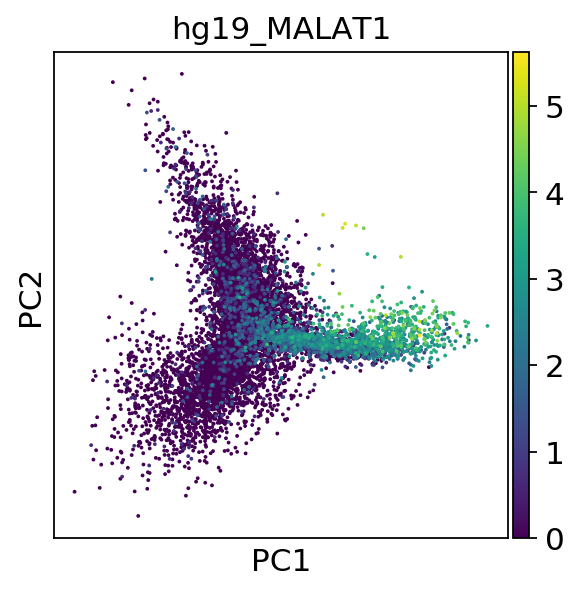

In [231]:
sc.pl.pca(adata, color='hg19_MALAT1')

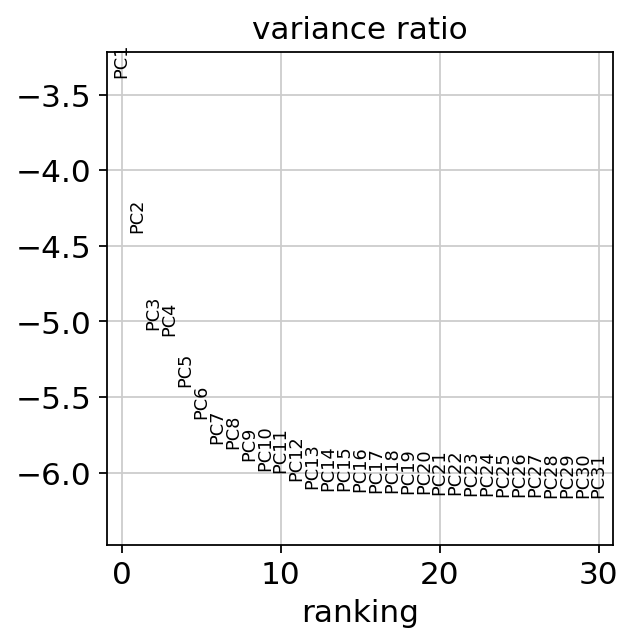

In [232]:
sc.pl.pca_variance_ratio(adata, log=True)

In [233]:
# plt.rcParams['figure.figsize'] = [30, 24]

# sc.pl.pca_loadings(adata)

In [234]:
#adata.obs['sample']

In [235]:
#adata.write(results_file)

In [236]:
#adata = sc.read(results_file)

In [237]:
sc.pp.neighbors(adata, n_neighbors=12, n_pcs=8) #n_neighbors=17, n_pcs=25)

computing neighbors
    using 'X_pca' with n_pcs = 8


/Users/derekbogdanoff/projects/venv3/lib/python3.7/site-packages/numba/compiler.py:588: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../venv3/lib/python3.7/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  self.func_ir.loc))


    finished (0:00:02.29) --> added to `.uns['neighbors']`
    'distances', distances for each pair of neighbors
    'connectivities', weighted adjacency matrix


In [238]:
 sc.tl.louvain(adata, resolution=0.5 )
    

running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished (0:00:02.37) --> found 11 clusters and added
    'louvain', the cluster labels (adata.obs, categorical)


In [239]:
 sc.tl.leiden(adata, resolution=0.5)

running Leiden clustering
    finished (0:00:02.20) --> found 11 clusters and added
    'leiden', the cluster labels (adata.obs, categorical)


In [240]:
# sc.tl.tsne(adata_filtered, 
#            n_pcs=5,
#           perplexity=20)
      

In [241]:
# plt.rcParams['figure.figsize'] = [10, 8]

# sc.pl.tsne(adata_filtered,
#            color=['leiden'],#'Lgals1','Rpl8']
#            palette="Paired",
#            color_map=mpl.cm.Greys,
#            ncols=2,
#            size=70)


In [242]:
sc.tl.umap(adata,
           min_dist=.1,
           spread=5,
           alpha=2
           )

computing UMAP
    using 'X_pca' with n_pcs = 8


/Users/derekbogdanoff/projects/venv3/lib/python3.7/site-packages/umap/umap_.py:1054: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


    finished (0:00:05.59) --> added
    'X_umap', UMAP coordinates (adata.obsm)


In [243]:
#adata.uns['louvain_colors'] = ['#1f77b4', '#f865da', '#f6abf0', '#d62728', '#9467bd', '#2ae9e9']
#adata.uns['louvain_colors'] = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']

#default['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']

In [244]:
adata

AnnData object with n_obs × n_vars = 10194 × 686 
    obs: 'n_counts', 'n_genes', 'percent_mito', 'louvain', 'leiden'
    var: 'n_cells'
    uns: 'pca', 'neighbors', 'louvain', 'leiden'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'

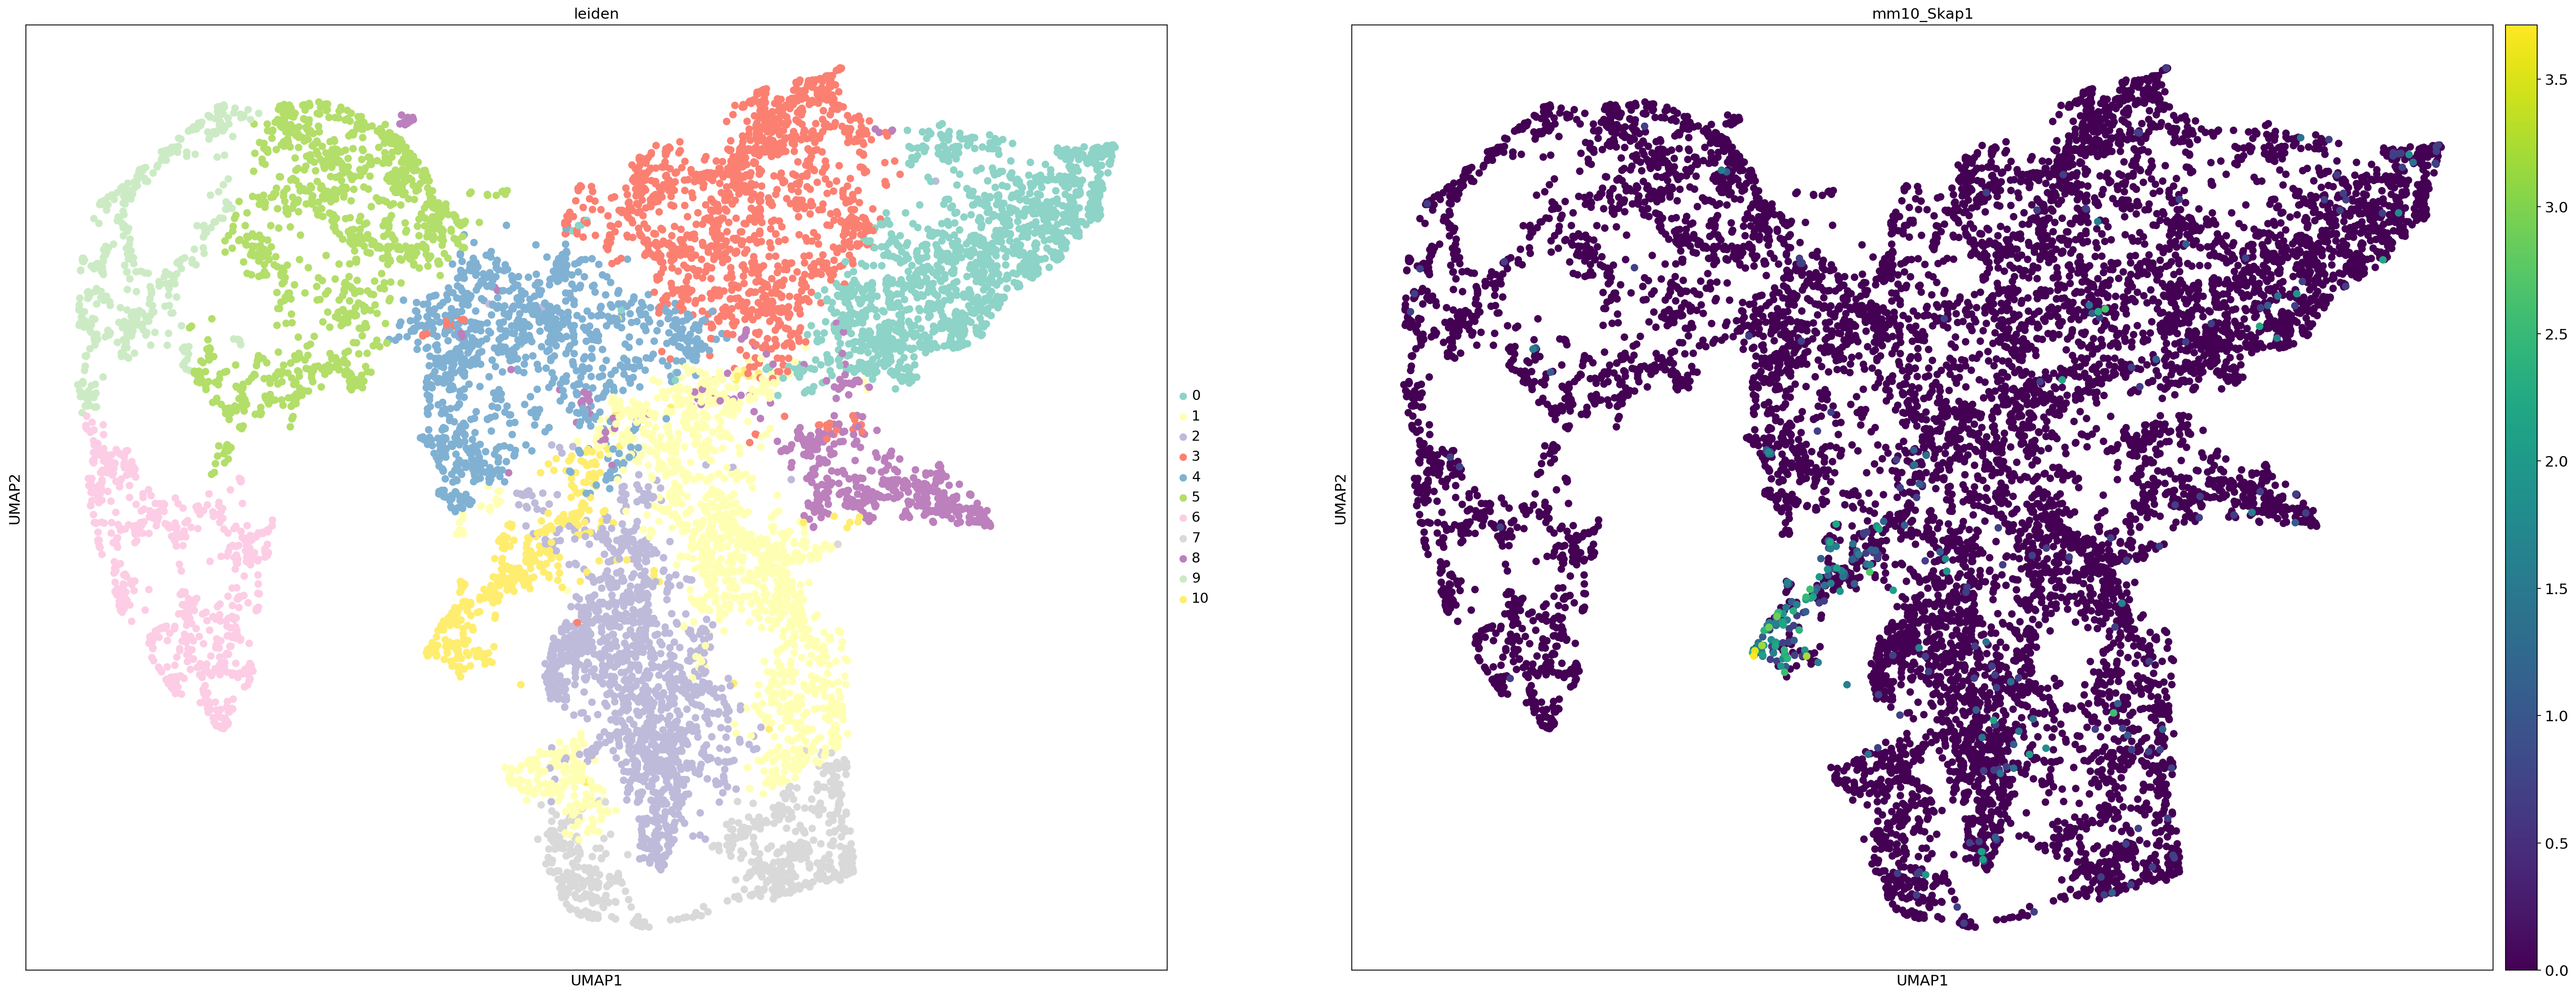

In [1146]:
 plt.rcParams['figure.figsize'] = [20, 16]

# # sc.pl.umap(adata, 
# #            color=['louvain'], 
# #            groups=[str(1),str(2)],
# #            size=100,
# #            ncols=2,
# #            frameon=False
# #           )


sc.pl.umap(adata, 
           color=['leiden','mm10_Skap1'],
           ncols=3,
           palette="Set3",
           #color_map=mpl.cm.Greys,# color_map=mpl.cm.Greys,'mm10_Ctss','mm10_Tgfbi','mm10_Lyz2'],
           size=200)# 'mm10_Alb','mm10_Trf','mm10_Apoa1','mm10_Serpina1c'], ncols=2, frameon=False)

In [246]:
sc.tl.rank_genes_groups(adata, 'leiden')
sc.pl.rank_genes_groups(adata, 
                        n_genes=10, 
                 #       groups=[str(3)],
                        ncols=1,
                        fontsize=20,
                        sharey=False
                       )

ranking genes


/Users/derekbogdanoff/projects/venv3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/derekbogdanoff/projects/venv3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/derekbogdanoff/projects/venv3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


    finished (0:00:02.25) --> added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids


In [247]:
#adata.write(results_file)

In [248]:
adata

AnnData object with n_obs × n_vars = 10194 × 686 
    obs: 'n_counts', 'n_genes', 'percent_mito', 'louvain', 'leiden'
    var: 'n_cells'
    uns: 'pca', 'neighbors', 'louvain', 'leiden', 'leiden_colors', 'rank_genes_groups'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'

In [259]:
adata_filtered = adata[adata.obs.leiden !=  '3']
adata_filtered = adata_filtered[adata_filtered.obs.leiden !=  '4']
adata_filtered = adata_filtered[adata_filtered.obs.leiden !=  '5']
adata_filtered = adata_filtered[adata_filtered.obs.leiden !=  '6']
adata_filtered = adata_filtered[adata_filtered.obs.leiden !=  '9']

adata_filtered = adata_filtered[adata_filtered.obs.leiden !=  '0']

In [260]:
adata_filtered

View of AnnData object with n_obs × n_vars = 4726 × 686 
    obs: 'n_counts', 'n_genes', 'percent_mito', 'louvain', 'leiden'
    var: 'n_cells'
    uns: 'pca', 'neighbors', 'louvain', 'leiden', 'leiden_colors', 'rank_genes_groups'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'

In [293]:
sc.pp.neighbors(adata_filtered, n_neighbors=8, n_pcs=10) #n_neighbors=17, n_pcs=25)

computing neighbors
    using 'X_pca' with n_pcs = 10
    finished (0:00:00.53) --> added to `.uns['neighbors']`
    'distances', distances for each pair of neighbors
    'connectivities', weighted adjacency matrix


In [1135]:
 sc.tl.leiden(adata_filtered, resolution=0.4)

running Leiden clustering
    finished (0:00:00.73) --> found 8 clusters and added
    'leiden', the cluster labels (adata.obs, categorical)


In [1136]:
 sc.tl.louvain(adata_filtered, resolution=0.5)

running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished (0:00:00.42) --> found 7 clusters and added
    'louvain', the cluster labels (adata.obs, categorical)


In [1137]:
sc.tl.umap(adata_filtered,
           min_dist=.05,
           spread=1,
           alpha=2
           )

computing UMAP
    using 'X_pca' with n_pcs = 10
    finished (0:00:05.38) --> added
    'X_umap', UMAP coordinates (adata.obsm)


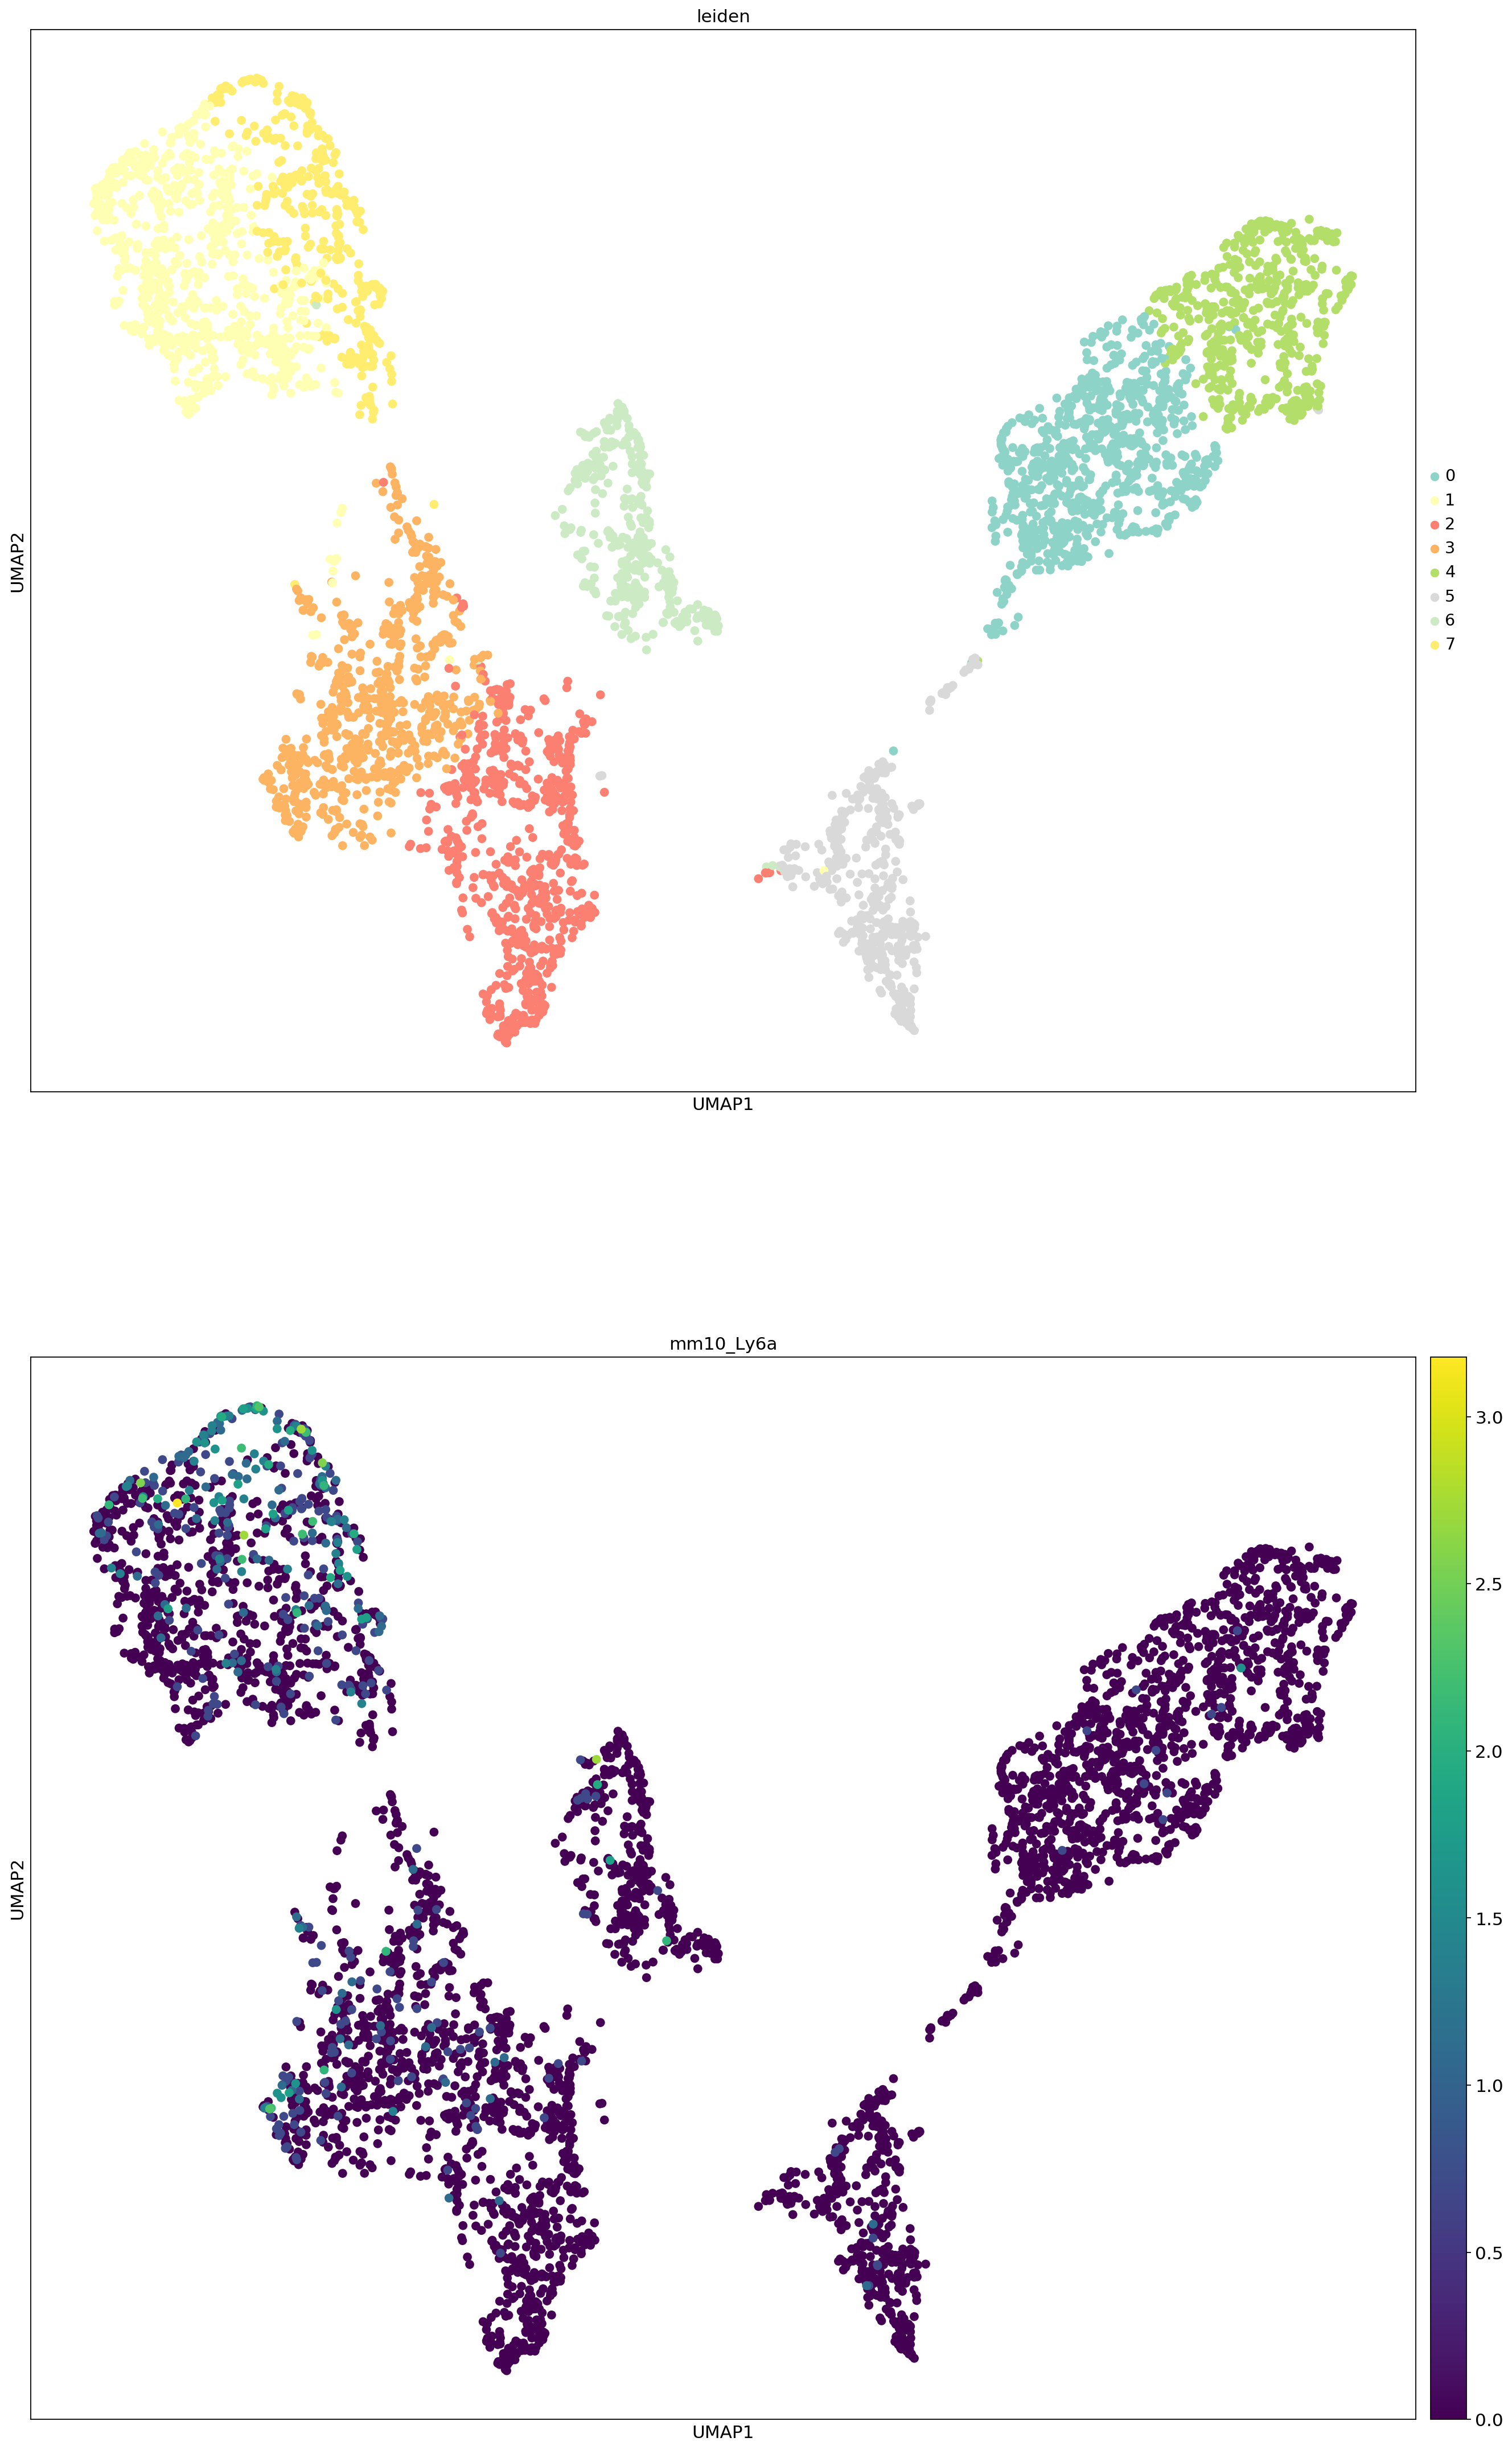

In [1152]:
 plt.rcParams['figure.figsize'] = [20, 16]

# # sc.pl.umap(adata, 
# #            color=['louvain'], 
# #            groups=[str(1),str(2)],
# #            size=100,
# #            ncols=2,
# #            frameon=False
# #           )


sc.pl.umap(adata_filtered, 
           color=['leiden','mm10_Ly6a'],
           ncols=1,
           palette="Set3",
           #color_map=mpl.cm.Greys,# color_map=mpl.cm.Greys,'mm10_Ctss','mm10_Tgfbi','mm10_Lyz2'],
           size=200)# 'mm10_Alb','mm10_Trf','mm10_Apoa1','mm10_Serpina1c'], ncols=2, frameon=False)

In [1157]:
adata_filtered

AnnData object with n_obs × n_vars = 4726 × 686 
    obs: 'n_counts', 'n_genes', 'percent_mito', 'louvain', 'leiden'
    var: 'n_cells'
    uns: 'pca', 'neighbors', 'louvain', 'leiden', 'leiden_colors', 'rank_genes_groups', 'louvain_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'

In [303]:
sc.tl.rank_genes_groups(adata_filtered, 'leiden')



ranking genes


/Users/derekbogdanoff/projects/venv3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/derekbogdanoff/projects/venv3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/derekbogdanoff/projects/venv3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


    finished (0:00:00.94) --> added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids


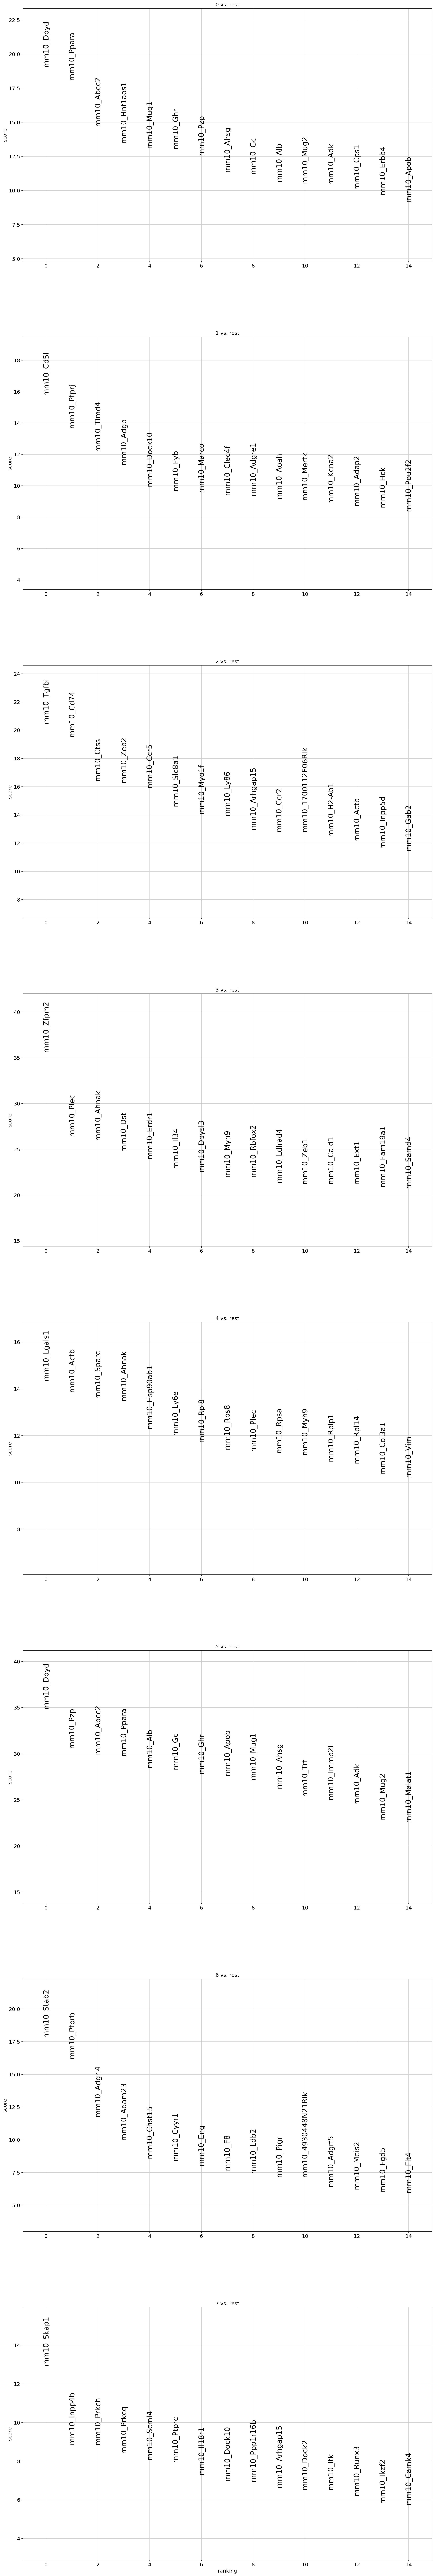

In [304]:
sc.pl.rank_genes_groups(adata_filtered, 
                        n_genes=15, 
                 #       groups=[str(3)],
                        ncols=1,
                        fontsize=20,
                        sharey=False
                       )